**Завдання 1:**

Напишіть код стиснення зображення з використанням алгоритму JPEG.

In [22]:
from PIL import Image
import os
import matplotlib.pyplot as plt

In [23]:
image = Image.open("kraevid.jpg")
width, height = image.size
image_format = image.format
color_mode = image.mode
image_size = os.path.getsize("kraevid.jpg")
print("Розмір зображення: {} x {}".format(width, height))
print("Формат зображення: {}".format(image_format))
print("Модель кольору: {}".format(color_mode))
print("Розмір файлу: {}".format(image_size))

Розмір зображення: 4000 x 3000
Формат зображення: JPEG
Модель кольору: RGB
Розмір файлу: 6313402


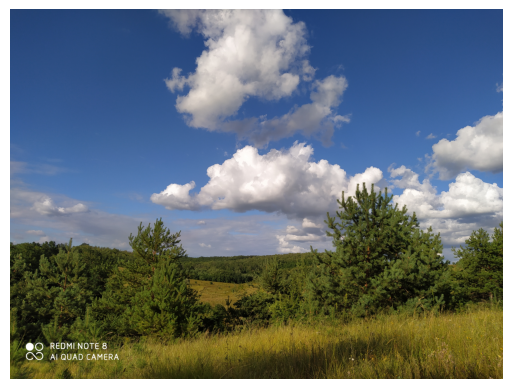

In [24]:
plt.axis('off')
plt.imshow(image)
plt.show()

In [28]:
image.save("compressed_image.jpg", "JPEG", quality=50)

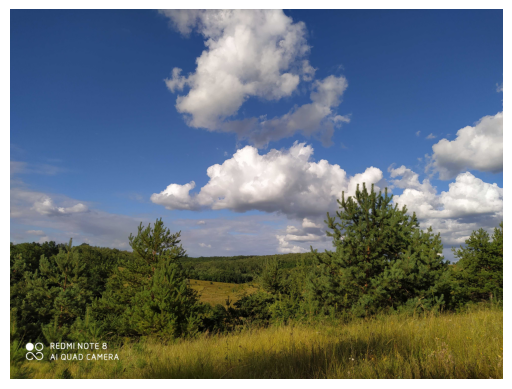

In [29]:
image = Image.open("compressed_image.jpg")
plt.axis('off')
plt.imshow(image)
plt.show()

In [31]:
width, height = image.size
image_format = image.format
color_mode = image.mode
image_size = os.path.getsize("compressed_image.jpg")
print("Розмір стиснутого зображення: {} x {}".format(width, height))
print("Формат стиснутого зображення: {}".format(image_format))
print("Модель кольору: {}".format(color_mode))
print("Розмірстиснутого файлу: {}".format(image_size))

Розмір стиснутого зображення: 4000 x 3000
Формат стиснутого зображення: JPEG
Модель кольору: RGB
Розмірстиснутого файлу: 955467


**Завдання 2:**

Використовуючи бібліотеку gzip, напишіть код для стиснення текстового файлу.

In [32]:
import gzip

In [41]:
source_file_path = "Akt.txt"
compressed_file_path = "Compressed_Akt.txt.gz"


with open(source_file_path, "rb") as source_file:
    with gzip.open(compressed_file_path, "wb") as compressed_file:
        compressed_file.write(source_file.read())


source_file_size = os.path.getsize(source_file_path)
compressed_file_size = os.path.getsize(compressed_file_path)

print(f"Початковий файл: {source_file_size} байт")
print(f"Стиснутий файл: {compressed_file_size} байт")

Початковий файл: 5071 байт
Стиснутий файл: 1704 байт


**Завдання 3:**

Реалізуйте алгоритм Хоффмана для стиснення текстових даних. Напишіть код для стиснення та розпакування текстового файлу за допомогою цьог алгоритму.

In [51]:
import heapq

In [68]:
class HuffmanCoding:

    def __init__(self, path):
        self.path = path
        self.heap = []
        self.codes = {}
        self.reverse_mapping = {}

    class HeapNode:

        def __init__(self, char, freq):
            self.char = char
            self.freq = freq
            self.left = None
            self.right = None

        def __lt__(self, other):
            return self.freq < other.freq

        def __eq__(self, other):
            if(other == None):
                return False
            if(not isinstance(other, HeapNode)):
                return False
            return self.freq == other.freq

    def make_frequency_dict(self, text):
        frequency = {}
        for character in text:
            if not character in frequency:
                frequency[character] = 0
            frequency[character] += 1
        return frequency

    def make_heap(self, frequency):
        for key in frequency:
            node = self.HeapNode(key, frequency[key])
            heapq.heappush(self.heap, node)

    def merge_nodes(self):
        while(len(self.heap)>1):
            node1 = heapq.heappop(self.heap)
            node2 = heapq.heappop(self.heap)

            merged = self.HeapNode(None, node1.freq + node2.freq)
            merged.left = node1
            merged.right = node2

            heapq.heappush(self.heap, merged)

    def make_codes_helper(self, root, current_code):
        if(root == None):
            return
        if(root.char != None):
            self.codes[root.char] = current_code
            self.reverse_mapping[current_code] = root.char
            return
        self.make_codes_helper(root.left, current_code + "0")
        self.make_codes_helper(root.right, current_code + "1")

    def make_codes(self):
        root = heapq.heappop(self.heap)
        current_code = ""
        self.make_codes_helper(root, current_code)

    def get_encoded_text(self, text):
        encoded_text = ""
        for character in text:
            encoded_text += self.codes[character]
        return encoded_text

    def get_byte_array(self, padded_encoded_text):
        if(len(padded_encoded_text) % 8 != 0):
            print("Encoded text not padded properly")
            exit(0)

        b = bytearray()
        for i in range(0, len(padded_encoded_text), 8):
            byte = padded_encoded_text[i:i+8]
            b.append(int(byte, 2))
        return b

    def pad_encoded_text(self, encoded_text):
        extra_padding = 8 - len(encoded_text) % 8
        for i in range(extra_padding):
            encoded_text += "0"

        padded_info = "{0:08b}".format(extra_padding)
        encoded_text = padded_info + encoded_text
        return encoded_text

    def compress(self):
        filename, file_extension = os.path.splitext(self.path)
        output_path = filename + ".bin"

        with open(self.path, 'rb') as file, open(output_path, 'wb') as output:
            text = file.read()
            text = text.rstrip()

            frequency = self.make_frequency_dict(text)
            self.make_heap(frequency)
            self.merge_nodes()
            self.make_codes()

            encoded_text = self.get_encoded_text(text)
            padded_encoded_text = self.pad_encoded_text(encoded_text)

            b = self.get_byte_array(padded_encoded_text)
            output.write(bytes(b))

        print("Compressed file saved as {}".format(output_path))
        return output_path

    def remove_padding(self, padded_encoded_text):
        padded_info = padded_encoded_text[:8]
        extra_padding = int(padded_info, 2)

        padded_encoded_text = padded_encoded_text[8:]
        encoded_text = padded_encoded_text[:-1*extra_padding]

        return encoded_text

    def decode_text(self, encoded_text):
        current_code = ""
        decoded_text = ""

        for bit in encoded_text:
            current_code += bit
            if(current_code in self.reverse_mapping):
                character = self.reverse_mapping[current_code]
                decoded_text += str(character)
                current_code = ""

        return decoded_text

    def decompress(self, input_path):
        filename, file_extension = os.path.splitext(self.path)
        output_path = filename + "_decompressed.txt"

        with open(input_path, 'rb') as file, open(output_path, 'w') as output:
            bit_string = ""

            byte = file.read(1)
            while(len(byte) > 0):
                byte = ord(byte)
                bits = bin(byte)[2:].rjust(8,'0')
                bit_string += bits
                byte = file.read(1)

            encoded_text = self.remove_padding(bit_string)

            decompressed_text = self.decode_text(encoded_text)

            output.write(decompressed_text)

        print("Decompressed file saved as {}".format(output_path))
        return output_path

In [71]:
huffman_compressed = HuffmanCoding('Akt.txt')
hoffman_akt = huffman_compressed.compress()
hoffman_akt = huffman_compressed.decompress(compressed_path)

Compressed file saved as Akt.bin
Decompressed file saved as Akt_decompressed.txt
